# TRINH DINH LAM - FINAL PROJECT OF DATA SCIENCE

#CANADIAN CHEESE FAT ANALYSIS AND PREDICTIVE MODELS

##Import library and display basic informations about the data


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

#reading dataset
df = pd.read_csv('cheese_data.csv.xls')
display(df.info())
display(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CheeseId              1042 non-null   int64  
 1   ManufacturerProvCode  1042 non-null   object 
 2   ManufacturingTypeEn   1042 non-null   object 
 3   MoisturePercent       1028 non-null   float64
 4   FlavourEn             801 non-null    object 
 5   CharacteristicsEn     643 non-null    object 
 6   Organic               1042 non-null   int64  
 7   CategoryTypeEn        1019 non-null   object 
 8   MilkTypeEn            1041 non-null   object 
 9   MilkTreatmentTypeEn   977 non-null    object 
 10  RindTypeEn            721 non-null    object 
 11  CheeseName            1042 non-null   object 
 12  FatLevel              1042 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 106.0+ KB


None

,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
count,1042.000000,1042,1042,1028.000000,801,643,1042.000000,1019,1041,977,721,1042,1042
unique,NaN,10,3,NaN,635,535,NaN,6,8,3,4,1038,2
top,NaN,QC,Industrial,NaN,Mild,Creamy,NaN,Firm Cheese,Cow,Pasteurized,No Rind,Ménestrel (Le),lower fat
freq,NaN,796,455,NaN,59,19,NaN,349,743,800,404,2,684
mean,1560.633397,NaN,NaN,47.069747,NaN,NaN,0.095010,NaN,NaN,NaN,NaN,NaN,NaN
std,451.811164,NaN,NaN,9.592647,NaN,NaN,0.293369,NaN,NaN,NaN,NaN,NaN,NaN
min,228.000000,NaN,NaN,12.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1280.250000,NaN,NaN,40.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1548.500000,NaN,NaN,46.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1901.750000,NaN,NaN,52.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


##Data Distribution Visualization

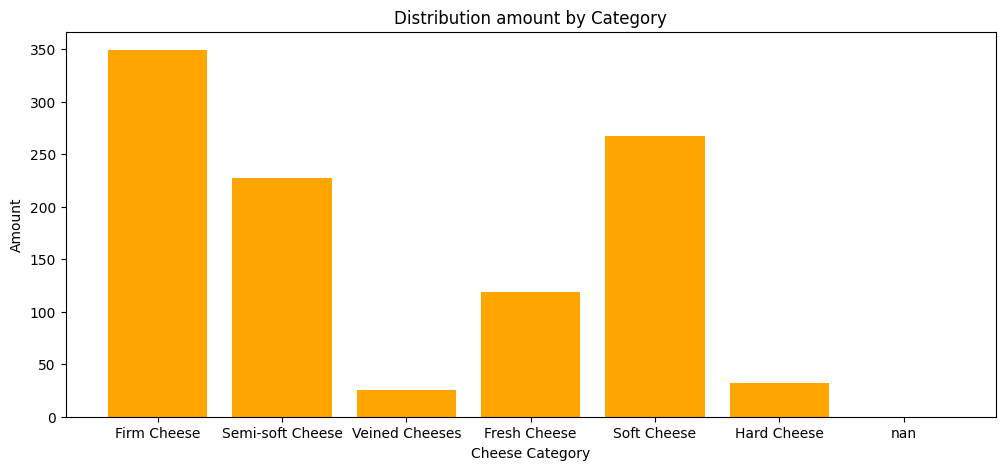

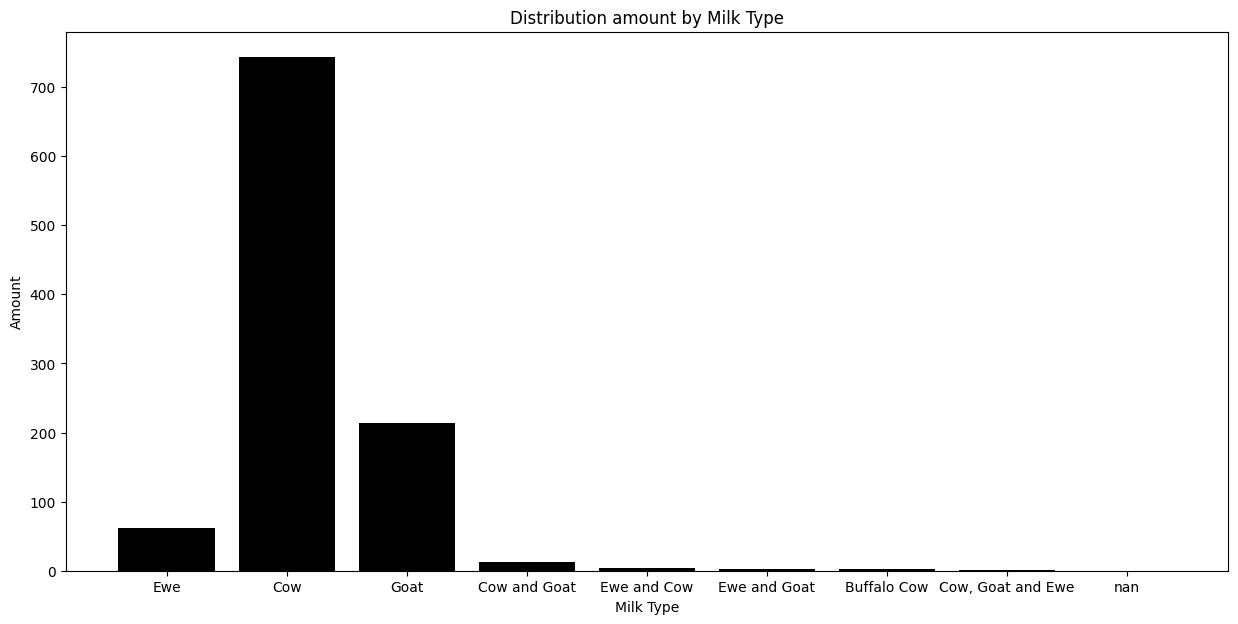

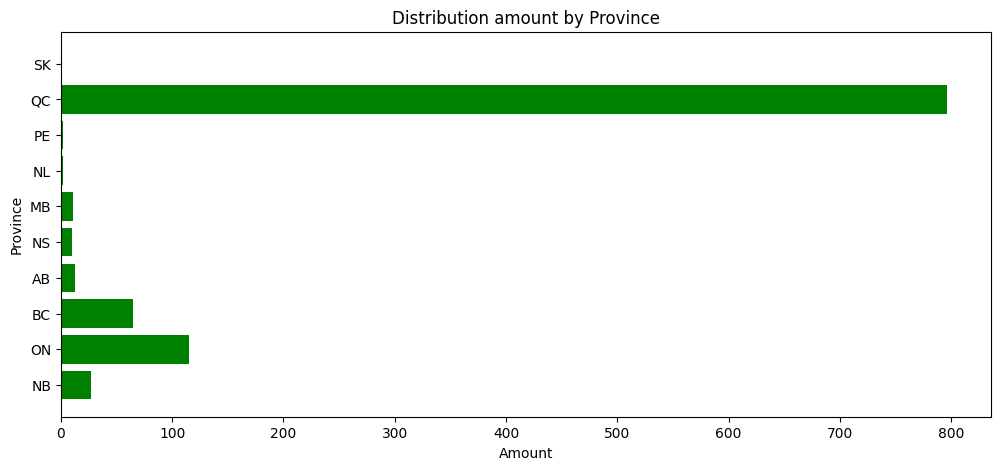

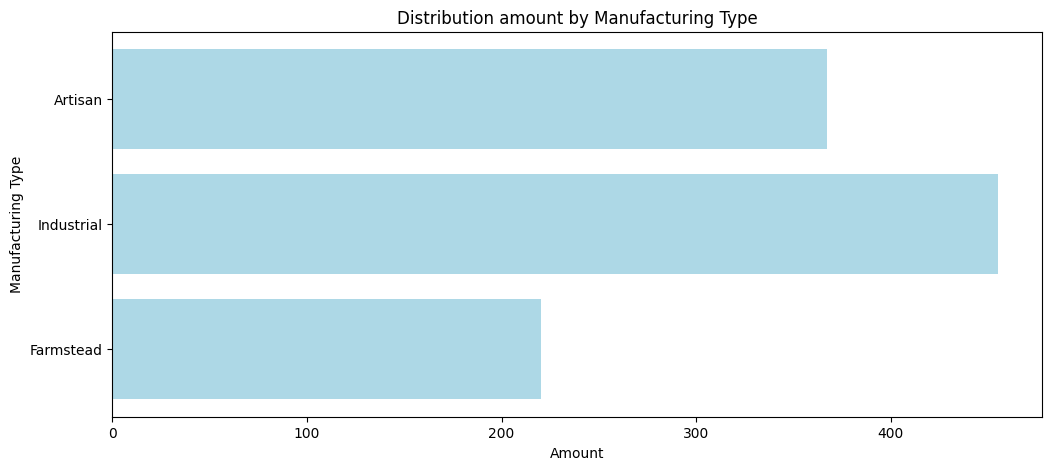

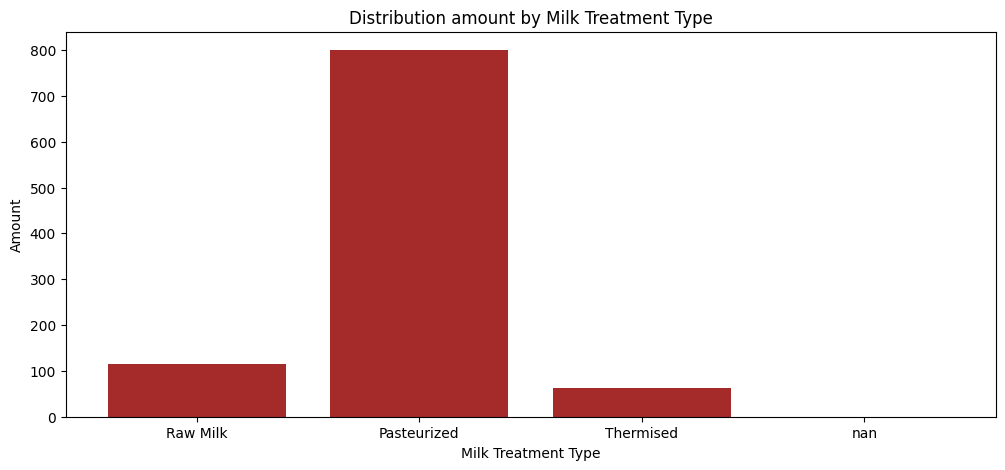

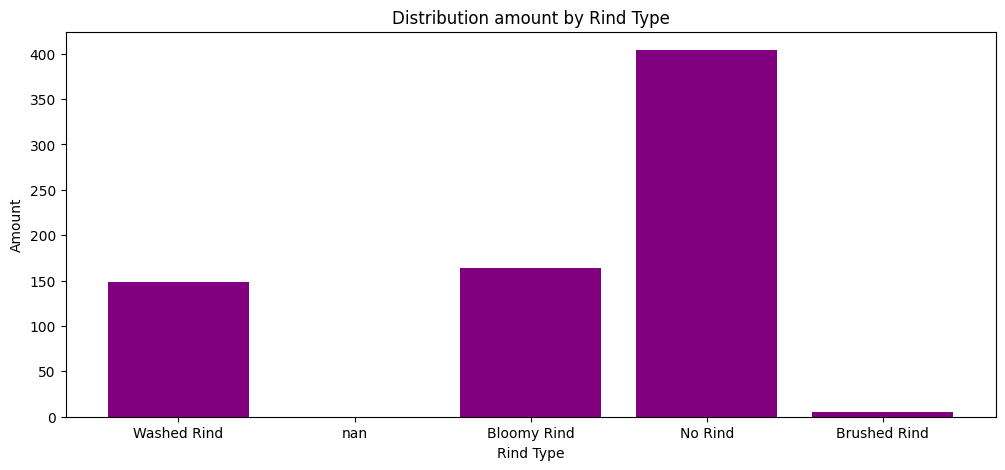

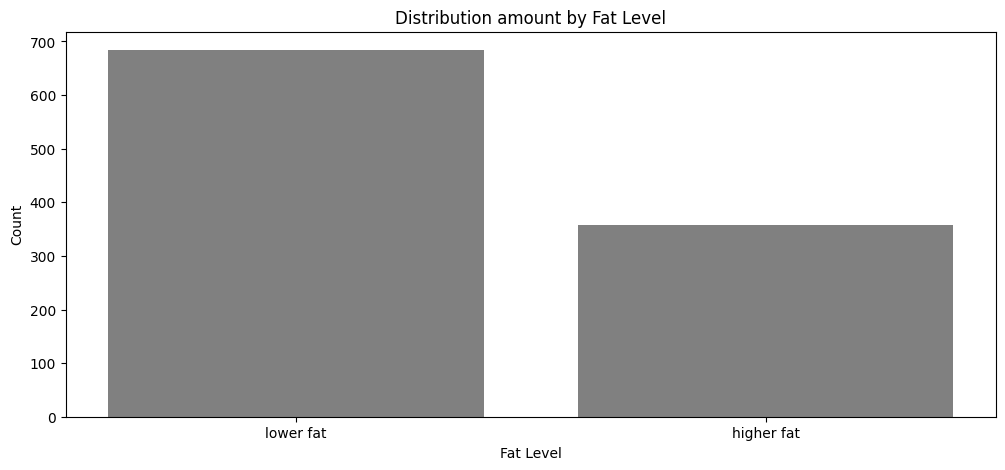

In [29]:
####Bar chart indicates distribution amount by Category
categoryArray = df['CategoryTypeEn'].to_numpy()
uniqueCategory=[]
for i in categoryArray:
  if(uniqueCategory.count(i)==0):
    uniqueCategory.append(i)
countCategory=[]
for i in uniqueCategory:
  countCategory.append(0)
for i in categoryArray:
  for j in range(len(uniqueCategory)):
    if(i==uniqueCategory[j]):
      countCategory[j]+=1
uniqueCategory= np.array(uniqueCategory)
uniqueCategory
plt.figure(figsize=(12,5))
plt.bar(uniqueCategory,countCategory, color='orange')
plt.xlabel("Cheese Category")
plt.ylabel("Amount")
plt.title("Distribution amount by Category")
plt.show()

###Bar chart indicates distribution amounts by Milk Type
categoryArray = df['MilkTypeEn'].to_numpy()
uniqueCategory=[]
for i in categoryArray:
  if(uniqueCategory.count(i)==0):
    uniqueCategory.append(i)
countCategory=[]
for i in uniqueCategory:
  countCategory.append(0)
for i in categoryArray:
  for j in range(len(uniqueCategory)):
    if(i==uniqueCategory[j]):
      countCategory[j]+=1
uniqueCategory= np.array(uniqueCategory)
uniqueCategory
plt.figure(figsize=(15,7))
plt.bar(uniqueCategory,countCategory, color='Black')
plt.xlabel("Milk Type")
plt.ylabel("Amount")
plt.title("Distribution amount by Milk Type")
plt.show()

###Bar chart show distribution amount by Provinces
categoryArray = df['ManufacturerProvCode'].to_numpy()
uniqueCategory=[]
for i in categoryArray:
  if(uniqueCategory.count(i)==0):
    uniqueCategory.append(i)
countCategory=[]
for i in uniqueCategory:
  countCategory.append(0)
for i in categoryArray:
  for j in range(len(uniqueCategory)):
    if(i==uniqueCategory[j]):
      countCategory[j]+=1
uniqueCategory= np.array(uniqueCategory)
uniqueCategory
plt.figure(figsize=(12,5))
plt.barh(uniqueCategory,countCategory, color='green')
plt.xlabel("Amount")
plt.ylabel("Province")
plt.title("Distribution amount by Province")
plt.show()

###Bar chart show distribution amount by Manufacturing Type
categoryArray = df['ManufacturingTypeEn'].to_numpy()
uniqueCategory=[]
for i in categoryArray:
  if(uniqueCategory.count(i)==0):
    uniqueCategory.append(i)
countCategory=[]
for i in uniqueCategory:
  countCategory.append(0)
for i in categoryArray:
  for j in range(len(uniqueCategory)):
    if(i==uniqueCategory[j]):
      countCategory[j]+=1
uniqueCategory= np.array(uniqueCategory)
uniqueCategory
plt.figure(figsize=(12,5))
plt.barh(uniqueCategory,countCategory, color='lightblue')
plt.xlabel("Amount")
plt.ylabel("Manufacturing Type")
plt.title("Distribution amount by Manufacturing Type")
plt.show()

###Bar chart show distribution amount by Milk Treatment Type
categoryArray = df['MilkTreatmentTypeEn'].to_numpy()
uniqueCategory=[]
for i in categoryArray:
  if(uniqueCategory.count(i)==0):
    uniqueCategory.append(i)
countCategory=[]
for i in uniqueCategory:
  countCategory.append(0)
for i in categoryArray:
  for j in range(len(uniqueCategory)):
    if(i==uniqueCategory[j]):
      countCategory[j]+=1
uniqueCategory= np.array(uniqueCategory)
uniqueCategory
plt.figure(figsize=(12,5))
plt.bar(uniqueCategory,countCategory, color='brown')
plt.xlabel("Milk Treatment Type")
plt.ylabel("Amount")
plt.title("Distribution amount by Milk Treatment Type")
plt.show()

###Bar chart show distribution amount by Milk Rind Type
categoryArray = df['RindTypeEn'].to_numpy()
uniqueCategory=[]
for i in categoryArray:
  if(uniqueCategory.count(i)==0):
    uniqueCategory.append(i)
countCategory=[]
for i in uniqueCategory:
  countCategory.append(0)
for i in categoryArray:
  for j in range(len(uniqueCategory)):
    if(i==uniqueCategory[j]):
      countCategory[j]+=1
uniqueCategory= np.array(uniqueCategory)
uniqueCategory
plt.figure(figsize=(12,5))
plt.bar(uniqueCategory,countCategory, color='purple')
plt.xlabel("Rind Type")
plt.ylabel("Amount")
plt.title("Distribution amount by Rind Type")
plt.show()

###Bar chart show distribution amount by Fat Level
categoryArray = df['FatLevel'].to_numpy()
uniqueCategory=[]
for i in categoryArray:
  if(uniqueCategory.count(i)==0):
    uniqueCategory.append(i)
countCategory=[]
for i in uniqueCategory:
  countCategory.append(0)
for i in categoryArray:
  for j in range(len(uniqueCategory)):
    if(i==uniqueCategory[j]):
      countCategory[j]+=1
uniqueCategory= np.array(uniqueCategory)
uniqueCategory
plt.figure(figsize=(12,5))
plt.bar(uniqueCategory,countCategory, color='grey')
plt.xlabel("Fat Level")
plt.ylabel("Count")
plt.title("Distribution amount by Fat Level")
plt.show()

##Data Preparation

In [30]:
#Dropping unused features
df=df.drop('CheeseName',axis=1)
df=df.drop('CharacteristicsEn',axis=1)
df=df.drop('FlavourEn',axis=1)
df=df.drop('CheeseId',axis=1)

#Looking for and dropping empty values
countNull = df.isnull().sum()
print(countNull)
count= df[df.columns[0]].count()
df.dropna(inplace=True)
count= df[df.columns[0]].count()
print("Total record: ",count)

#Defining X-axis and y-axis for analysis
X = df.drop("FatLevel",axis="columns")
y= pd.DataFrame(df,columns=['FatLevel'])

#Applying One-hot encoding to categorical variables
X = pd.get_dummies(X,columns=['ManufacturerProvCode'],prefix=['ManufacturerProvCode'])
X = pd.get_dummies(X,columns=['ManufacturingTypeEn'],prefix=['ManufacturingTypeEn'])
X = pd.get_dummies(X,columns=['CategoryTypeEn'],prefix=['CategoryTypeEn'])
X = pd.get_dummies(X,columns=['MilkTypeEn'],prefix=['MilkTypeEn'])
X = pd.get_dummies(X,columns=['MilkTreatmentTypeEn'],prefix=['MilkTreatmentTypeEn'])
X = pd.get_dummies(X,columns=['RindTypeEn'],prefix=['RindTypeEn'])
y = pd.get_dummies(y,columns=['FatLevel'],prefix=['FatLevel'])
y = y.drop("FatLevel_lower fat", axis='columns')

#Splitting data into training(80%), testing(20%) dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ManufacturerProvCode      0
ManufacturingTypeEn       0
MoisturePercent          14
Organic                   0
CategoryTypeEn           23
MilkTypeEn                1
MilkTreatmentTypeEn      65
RindTypeEn              321
FatLevel                  0
dtype: int64
Total record:  674


##Model selection

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Logistic Regression Confusion Matrix: 
 [[78 10]
 [15 32]]
Logistic Regression Accuracy: 0.81
Logistic Regression Precision: 0.76
Logistic Regression F1_score: 0.72
Logistic Regression Recall: 0.68
Logistic Regression Specificity: 0.89
Support Vector Confusion Matrix: 
 [[66 22]
 [14 33]]
Support Vector Accuracy: 0.73
Support Vector Precision: 0.60
Support Vector F1_score: 0.65
Support Vector Recall: 0.70
Support Vector Specificity: 0.75
Random Forest Confusion Matrix: 
 [[78 10]
 [ 5 42]]
Random Forest Accuracy: 0.89
Random Forest Precision: 0.81
Random Forest F1_score: 0.85
Random Forest Recall: 0.89
Random Forest Specificity: 0.89


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate:  0.01
Accuracy score (training): 0.866


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate:  0.05
Accuracy score (training): 0.907


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate:  0.1
Accuracy score (training): 0.920


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate:  0.25
Accuracy score (training): 0.942


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate:  0.5
Accuracy score (training): 0.950


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate:  0.75
Accuracy score (training): 0.950


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate:  1
Accuracy score (training): 0.950


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Confusion Matrix: 
 [[80  8]
 [ 8 39]]
Gradient Boosting Accuracy: 0.88
Gradient Boosting Precision: 0.83
Gradient Boosting F1_score: 0.83
Gradient Boosting Recall: 0.83
Gradient Boosting Specificity: 0.91
Naive Bayes Confusion Matrix: 
 [[84  4]
 [32 15]]
Naive Bayes Accuracy: 0.73
Naive Bayes Precision: 0.79
Naive Bayes F1_score: 0.45
Naive Bayes Recall: 0.32
Naive Bayes Specificity: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLP Confusion Matrix: 
 [[78 10]
 [13 34]]
MLP Accuracy: 0.83
MLP Precision: 0.77
MLP F1_score: 0.75
MLP Recall: 0.72
MLP Classification Specificity: 0.89


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


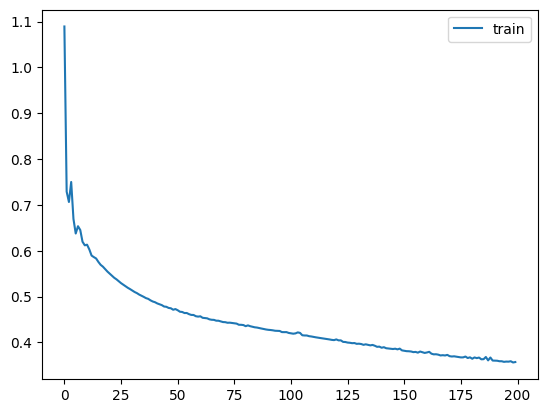

In [37]:
#Logistic Regression
#Defining and fitting the model
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
#Making prediction
y_pred_logisitic = logistic_model.predict(X_test)  # Predicted class labels
#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logisitic)
print("Logistic Regression Confusion Matrix: \n", conf_matrix)
#Performance matrix:
# Calculate accuracy
logistic_accuracy = accuracy_score(y_test, y_pred_logisitic)
print(f"Logistic Regression Accuracy: {logistic_accuracy:.2f}")
# Calculate precision (for positive class 1)
logistic_precision = precision_score(y_test, y_pred_logisitic)
print(f"Logistic Regression Precision: {logistic_precision:.2f}")
# Calculate f1-score
logistic_f1 = f1_score(y_test, y_pred_logisitic)
print(f"Logistic Regression F1_score: {logistic_f1:.2f}")
# Calculate recall (True Positive Rate / Sensitivity)
logistic_recall = recall_score(y_test, y_pred_logisitic)
print(f"Logistic Regression Recall: {logistic_recall:.2f}")
# Calculate specificity (True Negative Rate)
# Specificity can be derived manually from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
logistic_specificity = tn / (tn + fp)
print(f"Logistic Regression Specificity: {logistic_specificity:.2f}")
loss_values = logistic_model

#Support Vector Classification
#Defining and fitting the model
support_vector_model = SVC()
support_vector_model.fit(X_train,y_train)
#Making prediction
y_pred_svc = support_vector_model.predict(X_test)
#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svc)
print("Support Vector Confusion Matrix: \n", conf_matrix)
#Performance metrix
# Calculate accuracy
support_vector_accuracy = accuracy_score(y_test, y_pred_svc)
print(f"Support Vector Accuracy: {support_vector_accuracy:.2f}")
# Calculate precision (for positive class 1)
support_vector_precision = precision_score(y_test, y_pred_svc)
print(f"Support Vector Precision: {support_vector_precision:.2f}")
# Calculate f1-score
support_vector_f1 = f1_score(y_test, y_pred_svc)
print(f"Support Vector F1_score: {support_vector_f1:.2f}")
# Calculate recall (True Positive Rate / Sensitivity)
support_vector_recall = recall_score(y_test, y_pred_svc)
print(f"Support Vector Recall: {support_vector_recall:.2f}")
# Calculate specificity (True Negative Rate)
# Specificity can be derived manually from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
support_vector_specificity = tn / (tn + fp)
print(f"Support Vector Specificity: {support_vector_specificity:.2f}")

#Random Forest Classification
#Defining and fitting the model
random_forest_model = RandomForestClassifier(n_estimators = 150, random_state = 42)
random_forest_model.fit(X_train,y_train)
#Making prediction
y_pred_randomforest = random_forest_model.predict(X_test)
#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_randomforest)
print("Random Forest Confusion Matrix: \n", conf_matrix)
#Performance matrix
# Calculate accuracy
random_forest_accuracy = accuracy_score(y_test, y_pred_randomforest)
print(f"Random Forest Accuracy: {random_forest_accuracy:.2f}")
# Calculate precision (for positive class 1)
random_forest_precision = precision_score(y_test, y_pred_randomforest)
print(f"Random Forest Precision: {random_forest_precision:.2f}")
# Calculate f1-score
random_forest_f1 = f1_score(y_test, y_pred_randomforest)
print(f"Random Forest F1_score: {random_forest_f1:.2f}")
# Calculate recall (True Positive Rate / Sensitivity)
random_forest_recall = recall_score(y_test, y_pred_randomforest)
print(f"Random Forest Recall: {random_forest_recall:.2f}")
# Calculate specificity (True Negative Rate)
# Specificity can be derived manually from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
random_forest_specificity = tn / (tn + fp)
print(f"Random Forest Specificity: {random_forest_specificity:.2f}")


#Gradient Boosting Classification
#Trying to find the best learning rate for weak learners in the algorithms
#Randomize values in an array from 0.01 to 1 and get the best accuracy score based on the given learning rate
learning_rates = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gradient_boosting_model = GradientBoostingClassifier(n_estimators=120, learning_rate = learning_rate,random_state = 42)
    gradient_boosting_model.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gradient_boosting_model.score(X_train, y_train)))
#After finding out the approriate learning rate, apply to actual Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(n_estimators=120, learning_rate = 0.5,random_state = 42)
gradient_boosting_model.fit(X_train, y_train)
#Making prediction
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)
#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gradient_boosting)
print("Gradient Boosting Confusion Matrix: \n", conf_matrix)
#Performance matrix
# Calculate accuracy
gradient_boosting_accuracy = accuracy_score(y_test, y_pred_gradient_boosting)
print(f"Gradient Boosting Accuracy: {gradient_boosting_accuracy:.2f}")
# Calculate precision (for positive class 1)
gradient_boosting_precision = precision_score(y_test, y_pred_gradient_boosting)
print(f"Gradient Boosting Precision: {gradient_boosting_precision:.2f}")
# Calculate f1-score
gradient_boosting_f1 = f1_score(y_test, y_pred_gradient_boosting)
print(f"Gradient Boosting F1_score: {gradient_boosting_f1:.2f}")
# Calculate recall (True Positive Rate / Sensitivity)
gradient_boosting_recall = recall_score(y_test, y_pred_gradient_boosting)
print(f"Gradient Boosting Recall: {gradient_boosting_recall:.2f}")
# Calculate specificity (True Negative Rate)
# Specificity can be derived manually from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
gradient_boosting_specificity = tn / (tn + fp)
print(f"Gradient Boosting Specificity: {gradient_boosting_specificity:.2f}")

#Naive Bayes Classification
#Defining and fitting the model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train,y_train)
#Making prediction
y_pred_naive_bayes = naive_bayes_model.predict(X_test)
#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_naive_bayes)
print("Naive Bayes Confusion Matrix: \n", conf_matrix)
#Performance matrix
# Calculate accuracy
naive_bayes_accuracy = accuracy_score(y_test, y_pred_naive_bayes)
print(f"Naive Bayes Accuracy: {naive_bayes_accuracy:.2f}")
# Calculate precision (for positive class 1)
naive_bayes_precision = precision_score(y_test, y_pred_naive_bayes)
print(f"Naive Bayes Precision: {naive_bayes_precision:.2f}")
# Calculate f1-score
naive_bayes_f1 = f1_score(y_test, y_pred_naive_bayes)
print(f"Naive Bayes F1_score: {naive_bayes_f1:.2f}")
# Calculate recall (True Positive Rate / Sensitivity)
naive_bayes_recall = recall_score(y_test, y_pred_naive_bayes)
print(f"Naive Bayes Recall: {naive_bayes_recall:.2f}")
# Calculate specificity (True Negative Rate)
# Specificity can be derived manually from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
naive_bayes_specificity = tn / (tn + fp)
print(f"Naive Bayes Specificity: {naive_bayes_specificity:.2f}")

#Neutral Network( Multi-Layers Perception Classification)
#Defining and fitting the model
mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train,y_train)
#Making prediction
y_pred_mlp = mlp_model.predict(X_test)
#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_mlp)
print("MLP Confusion Matrix: \n", conf_matrix)
#Performance matrix
# Calculate accuracy
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {mlp_accuracy:.2f}")
# Calculate precision (for positive class 1)
mlp_precision = precision_score(y_test, y_pred_mlp)
print(f"MLP Precision: {mlp_precision:.2f}")
# Calculate f1-score
mlp_f1 = f1_score(y_test, y_pred_mlp)
print(f"MLP F1_score: {mlp_f1:.2f}")
# Calculate recall (True Positive Rate / Sensitivity)
mlp_recall = recall_score(y_test, y_pred_mlp)
print(f"MLP Recall: {mlp_recall:.2f}")
# Calculate specificity (True Negative Rate)
# Specificity can be derived manually from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
mlp_specificity = tn / (tn + fp)
print(f"MLP Classification Specificity: {mlp_specificity:.2f}")

# Plot loss function in training period of MLP Neutral Network
plt.plot(mlp_model.loss_curve_,label="train")
plt.legend()


##Summary Table vs Conclusion

In [36]:
#Creating summary table for comparision
summaryDf = pd.DataFrame(columns=['Algorithms', 'Accuracy','Precision','F1_score','Recall','Specificity'])
summaryDf['Algorithms'] = ['Logistic Regression', 'Support Vector Classification', 'Random Forest Classification','Gradient Boosting Classification','Naive Bayes Classification','Neutral Network( MLPClassification)']
summaryDf['Accuracy'] = [logistic_accuracy,support_vector_accuracy,random_forest_accuracy,gradient_boosting_accuracy,naive_bayes_accuracy,mlp_accuracy]
summaryDf['Precision'] = [logistic_precision,support_vector_precision,random_forest_accuracy,gradient_boosting_precision,naive_bayes_precision,mlp_precision]
summaryDf['F1_score'] = [logistic_f1,support_vector_f1,random_forest_f1,gradient_boosting_f1,naive_bayes_f1,mlp_f1]
summaryDf['Recall'] = [logistic_recall,support_vector_recall,random_forest_recall,gradient_boosting_recall,naive_bayes_recall,mlp_recall]
summaryDf['Specificity'] = [logistic_specificity,support_vector_specificity,random_forest_specificity,gradient_boosting_specificity,naive_bayes_specificity,mlp_specificity]
summaryDf


,Algorithms,Accuracy,Precision,F1_score,Recall,Specificity
0,Logistic Regression,0.814815,0.761905,0.719101,0.680851,0.886364
1,Support Vector Classification,0.733333,0.600000,0.647059,0.702128,0.750000
2,Random Forest Classification,0.888889,0.888889,0.848485,0.893617,0.886364
3,Gradient Boosting Classification,0.881481,0.829787,0.829787,0.829787,0.909091
4,Naive Bayes Classification,0.733333,0.789474,0.454545,0.319149,0.954545
5,Neutral Network( MLPClassification),0.829630,0.772727,0.747253,0.723404,0.886364
